In [4]:
import glob
import sys
import time
import os.path
import copy
import numpy as np
import healpy
import fitsio
from multiprocessing import Pool

#from .utils import userprint

import glob
from matplotlib import pyplot as plt 
from astropy.io import fits
from astropy.table import Table, join, vstack
from vast.voidfinder.distance import z_to_comoving_dist
from vast.voidfinder.preprocessing import load_data_to_Table

In [5]:
print("run please")
def userprint(*args, **kwds):
    """Defines an extension of the print function.
    Args:
        *args: arguments passed to print
        **kwargs: keyword arguments passed to print
    """
    print(*args, **kwds)
    sys.stdout.flush()

    
#line 1439 in master/py/picca/io.py
 
    
def read_deltas(in_dir,
                nside,
                lambda_abs,
                alpha,
                z_ref,
                cosmo,
                max_num_spec=None,
                no_project=False,
                from_image=None,
                nproc=None):
    
    files = []
    in_dir = os.path.expandvars(in_dir)
    if from_image is None or len(from_image) == 0:
        if len(in_dir) > 8 and in_dir[-8:] == '.fits.gz':
            files += sorted(glob.glob(in_dir))
        elif len(in_dir) > 5 and in_dir[-5:] == '.fits':
            files += sorted(glob.glob(in_dir))
        else:
            files += sorted(glob.glob(in_dir + '/*.fits') + glob.glob(in_dir +
                                                               '/*.fits.gz'))
    else:
        for arg in from_image:
            if len(arg) > 8 and arg[-8:] == '.fits.gz':
                files += sorted(glob.glob(arg))
            elif len(arg) > 5 and arg[-5:] == '.fits':
                files += sorted(glob.glob(arg))
            else:
                files += sorted(glob.glob(arg + '/*.fits') + glob.glob(arg +
                                                                '/*.fits.gz'))
    files = sorted(files)

    arguments = [(f, from_image) for f in files]
    pool = Pool(processes=nproc)
    results = pool.starmap(read_delta_file, arguments)
    pool.close()

    deltas = []
    num_data = 0
    for delta in results:
        if delta is not None:
            deltas += delta
            num_data = len(deltas)
            if (max_num_spec is not None) and (num_data > max_num_spec):
                break

    # truncate the deltas if we load too many lines of sight
    if max_num_spec is not None:
        deltas = deltas[:max_num_spec]
        num_data = len(deltas)

    userprint("\n")
    
    
    # compute healpix numbers
    phi = [delta.ra for delta in deltas]
    theta = [np.pi / 2. - delta.dec for delta in deltas]
    healpixs = healpy.ang2pix(nside, theta, phi)
    if healpixs.size == 0:
        raise AssertionError('ERROR: No data in {}'.format(in_dir))

    data = {}
    z_min = 10**deltas[0].log_lambda[0] / lambda_abs - 1.
    z_max = 0.
    for delta, healpix in zip(deltas, healpixs):
        z = 10**delta.log_lambda / lambda_abs - 1.
        z_min = min(z_min, z.min())
        z_max = max(z_max, z.max())
        delta.z = z
        if not cosmo is None:
            delta.r_comov = cosmo.get_r_comov(z)
            delta.dist_m = cosmo.get_dist_m(z)
        delta.weights *= ((1 + z) / (1 + z_ref))**(alpha - 1)

        if not no_project:
            delta.project()

        if not healpix in data:
            data[healpix] = []
        data[healpix].append(delta)

    return data, num_data, z_min, z_max

run please


In [6]:
Files=[]
Allra=[]
Alldec=[]
RAlist=[]
DEClist=[]
for n in range(1,575):
    filename='/global/u1/s/sgontcho/desi/desi-everest/Delta_LYA/redo-metadata/Deltas/delta-'+str(n)+'.fits.gz'
    try:
        l_ref=1216
        hdul = fits.open(filename)
        Files.append(n)
    except:
        continue



In [7]:
for m in Files:
    filename='/global/u1/s/sgontcho/desi/desi-everest/Delta_LYA/redo-metadata/Deltas/delta-'+str(m)+'.fits.gz'
    hdul = fits.open(filename)
    data=Table(hdul[1].data)
    RAs=np.array([])
    DECs=np.array([])
    for n in range(0,len(data)-1):
        try:
            RAs=np.append(RAs,hdul[n].header['RA'])
            DECs=np.append(DECs,hdul[n].header['DEC'])
            Allra.append(hdul[n].header['RA'])
            Alldec.append(hdul[n].header['DEC'])
        except:
            continue
    RAlist.append(RAs)
    DEClist.append(DECs)

KeyboardInterrupt: 

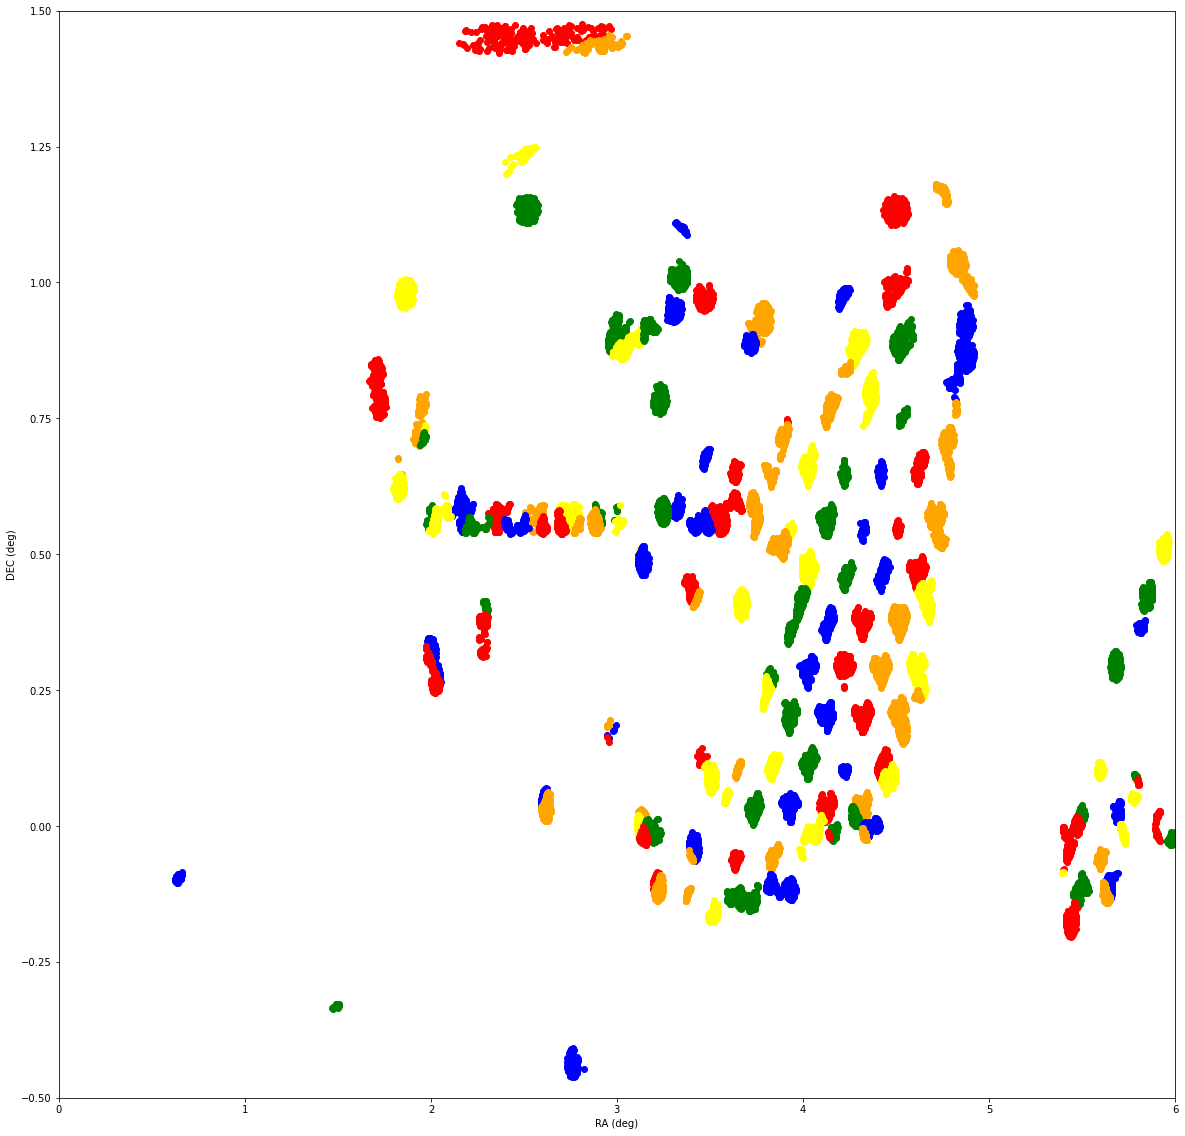

In [5]:
plt.figure(figsize=(20,20))
colors = ["red","orange","yellow","green","blue","black"]
for x in range (0,len(Files)-1):
    plt.scatter(RAlist[x],DEClist[x],c=colors[x%5]) 



plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.xlim([0,6])
plt.ylim([-0.5,1.5])
plt.show()

In [ ]:
RAplot=[]
DECplot=[]
RAs=np.array([])
DECs=np.array([])
Deltas=np.array([])
Redshifts=np.array([])
l_ref=1216
for m in Files:
    filename='/global/u1/s/sgontcho/desi/desi-everest/Delta_LYA/redo-metadata/Deltas/delta-'+str(m)+'.fits.gz'
    hdul = fits.open(filename)
    print(m)
    for n in range(1,len(hdul)-1):
        data=Table(hdul[n].data)
        if hdul[n].header['RA']<2.68519 and hdul[n].header['RA']>2.55429 and hdul[n].header['DEC']>-0.02737 and hdul[n].header['DEC']<0.10353:
            RAplot.append(hdul[n].header['RA'])
            DECplot.append(hdul[n].header['DEC'])
            for row in range(len(data)):
                Deltas=np.append(Deltas,data.field(1)[row])
                RAs=np.append(RAs,hdul[n].header['RA'])
                DECs=np.append(DECs,hdul[n].header['DEC'])
                loglam=data.field(0)[row]
                l_obs=10**(loglam)
                z=(l_obs-l_ref)/l_ref
                Redshifts=np.append(Redshifts,z)
print(len(RAplot))

1
7
16
30
32
35
36
45
50
53
54
55
67
71
72
73
74
76
77
78
91
92
97
98
100
101
102
103
104
105
120
121
122
128
129
130
131
132
133
134
135
136
153
154
155
156
157
158
159
161
162
163
164
165
166
167
168
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
206
220
224
225
226
227
228
229
230
231
232
238
250
251
257
258
259
260
261
262
263
268
269
282
287
291
292
293
294
295
296
301
319
321
322
323
324
325
326
327
332
333
349
355
356
357
358
359
364
365
366
381
383
384
385
386
387
388
389
390
395
396
397
398
403
416
417
418
419
420
421
422
427
428
449
450
451
459
460
482
503
542
574
481


In [27]:
col1 = fits.Column(name='ra', array=RAs, format="E")
col2 = fits.Column(name='dec', array=DECs, format="E")
col3 = fits.Column(name='z', array=Redshifts, format="E")
col4 = fits.Column(name='Delta', array=Deltas, format="E")

cols=fits.ColDefs([col1,col2,col3,col4])
hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto('/global/homes/s/schampat/Voids/Void_analysis/Data/deltatable.fits',overwrite=True)

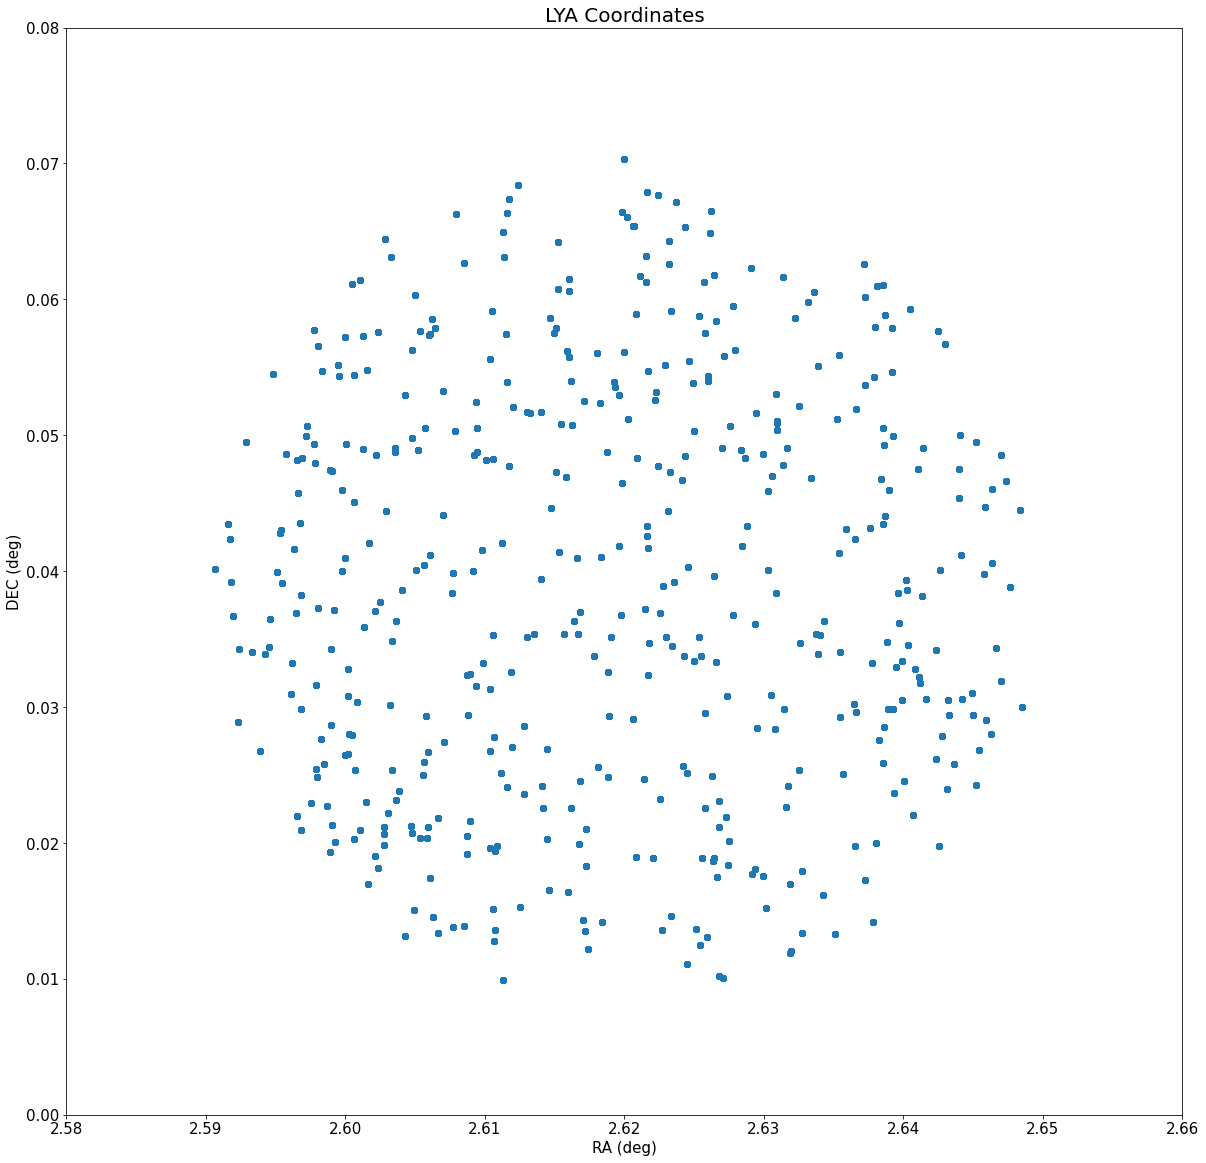

In [29]:
filename='/global/homes/s/schampat/Voids/Void_analysis/Data/deltatable.fits'
hdul=fits.open(filename)
data=Table(hdul[1].data)
plt.figure(figsize=(20,20))
plt.scatter(data['ra'],data['dec']) 



plt.title("LYA Coordinates",fontsize=20)
plt.xlabel("RA (deg)",fontsize=15)
plt.ylabel("DEC (deg)",fontsize=15)
plt.xlim([2.58,2.66])
plt.ylim([0.00,0.08])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

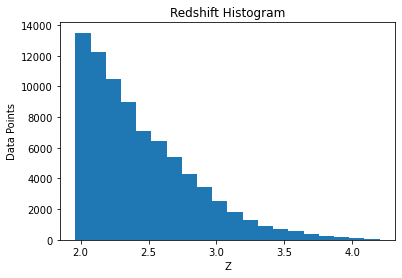

In [30]:
plt.hist(data['z'],bins=20)
plt.title("Redshift Histogram")
plt.xlabel("Z")
plt.ylabel("Data Points")
plt.show()

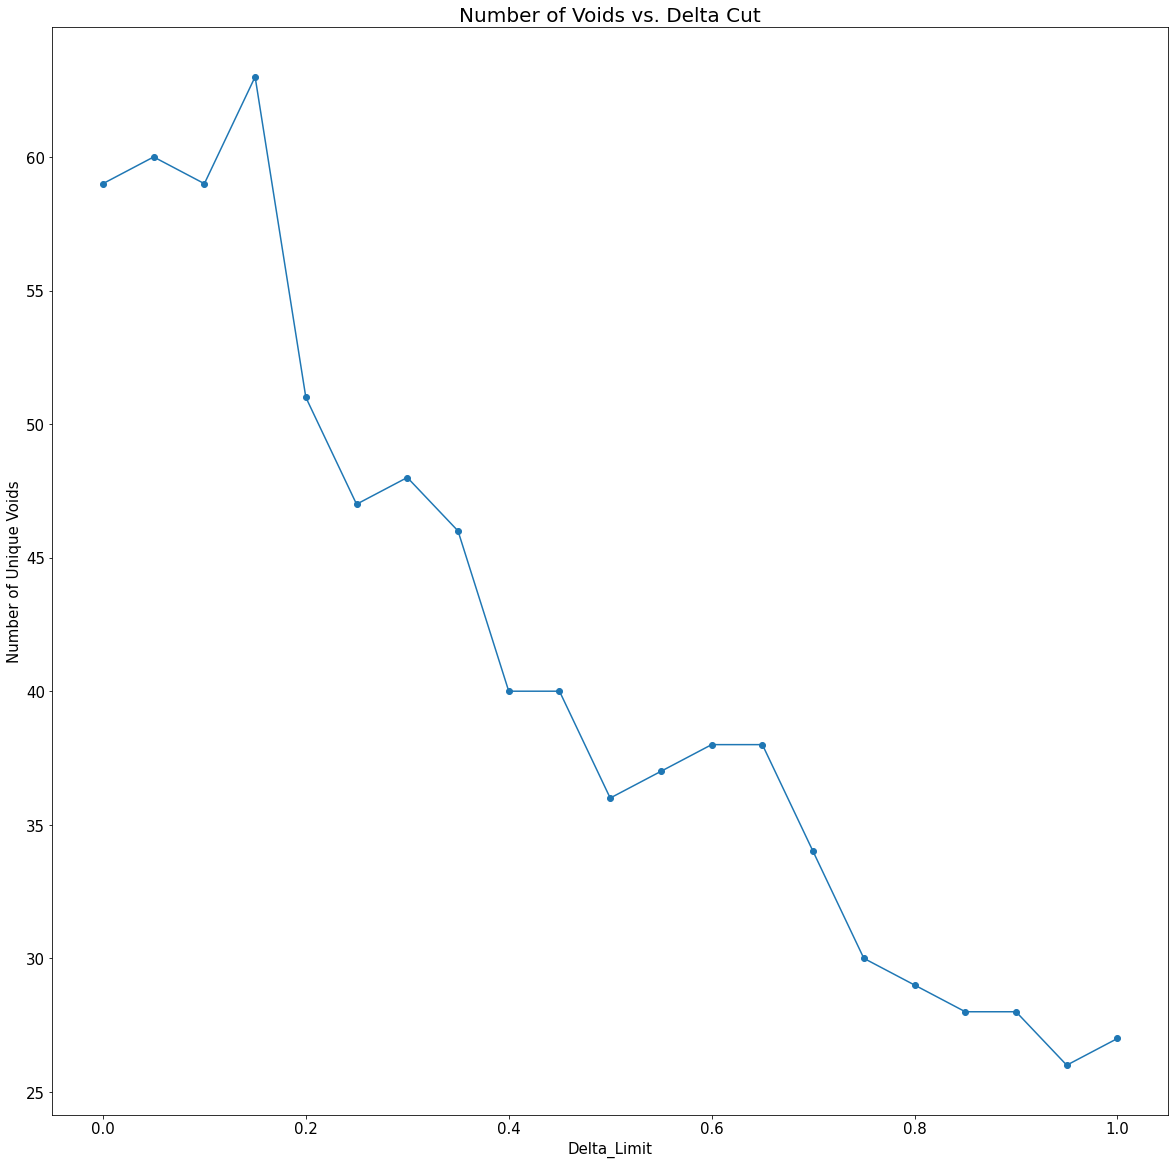

In [32]:
deltalimlist=[]
for x in range(0,21,1):
    deltalimlist.append(x/20)

plt.figure(figsize=(20,20))

plt.plot(deltalimlist,[59,60,59,63,51,47,48,46,40,40,36,37,38,38,34,30,29,28,28,26,27],marker='o') 
plt.title("Number of Voids vs. Delta Cut",fontsize=20)
plt.xlabel("Delta_Limit",fontsize=15)
plt.ylabel("Number of Unique Voids",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [6]:
filename="/global/u1/s/sgontcho/desi/desi-everest/Delta_LYA/redo-metadata/Deltas/delta-1.fits.gz"
hdul = fits.open(filename)
hdul[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                  150 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'LOGLAM  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'log Angstrom'       / physical unit of field                         
TTYPE2  = 'DELTA_BLIND'        / label for field   2                            
TFORM2  = 'D       '        

In [8]:
RAs=np.array([])
DECs=np.array([])
Redshifts=np.array([])
for m in Files:
    filename='/global/u1/s/sgontcho/desi/desi-everest/Delta_LYA/redo-metadata/Deltas/delta-'+str(m)+'.fits.gz'
    hdul = fits.open(filename)
    print(m)
    for n in range(1,len(hdul)-1):
        data=Table(hdul[n].data)
        if hdul[n].header['RA']<2.68519 and hdul[n].header['RA']>2.55429 and hdul[n].header['DEC']>-0.02737 and hdul[n].header['DEC']<0.10353:
            RAs=np.append(RAs,hdul[n].header['RA'])
            DECs=np.append(DECs,hdul[n].header['DEC'])
            Redshifts=np.append(Redshifts,hdul[n].header['Z'])
            
        

1
7
16
30
32
35
36
45
50
53
54
55
67
71
72
73
74
76
77
78
91
92
97
98
100
101
102
103
104
105
120
121
122
128
129
130
131
132
133
134
135
136
153
154
155
156
157
158
159
161
162
163
164
165
166
167
168
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
206
220
224
225
226
227
228
229
230
231
232
238
250
251
257
258
259
260
261
262
263
268
269
282
287
291
292
293
294
295
296
301
319
321
322
323
324
325
326
327
332
333
349
351
352
354
355
356
357
358
359
364
365
366
381
383
384
385
386
388
389
390
395
396
397
398
403
416
417
418
419
420
421
422
427
428
429
430
448
449
450
451
459
460
482
503
542
574


In [11]:
col1 = fits.Column(name='ra', array=RAs, format="E")
col2 = fits.Column(name='dec', array=DECs, format="E")
col3 = fits.Column(name='z', array=Redshifts, format="E")

cols=fits.ColDefs([col1,col2,col3])
hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto('/global/homes/s/schampat/Voids/Void_analysis/Data/Quasars-redshift.fits',overwrite=True)

In [12]:
filename = "/global/homes/s/schampat/Voids/Void_analysis/Data/Quasars-redshift.fits"
hdul = fits.open(filename)
datatable = Table(hdul[1].data)

datatable['Rgal']= z_to_comoving_dist(datatable['z'].astype(np.float32),0.26,1)

In [13]:
datatable

ra,dec,z,Rgal
float32,float32,float32,float32
2.5950856,0.03995798,3.577208,5014.4043
2.5953968,0.043061696,2.8750079,4546.0903
2.6006157,0.045104377,2.1048005,3869.383
2.5965052,0.0481664,2.7702327,4465.6816
2.6094496,0.050539482,2.860919,4535.46
2.6042798,0.052977987,3.296496,4840.517
2.6035767,0.04906695,2.2546446,4018.3489
2.6000605,0.049357306,2.4691103,4215.754
2.6092472,0.048566528,2.3779464,4133.982


In [15]:
RAs=np.array([])
DECs=np.array([])
Redshifts=np.array([])
Comoving=np.array([])

for m in range (len(datatable)):
                
    RAs=np.append(RAs,datatable['ra'][m])
    DECs=np.append(DECs,datatable['dec'][m])
    Redshifts=np.append(Redshifts,datatable['z'][m])
    Comoving=np.append(Comoving,datatable['Rgal'][m])

In [16]:
col1 = fits.Column(name='ra', array=RAs, format="E")
col2 = fits.Column(name='dec', array=DECs, format="E")
col3 = fits.Column(name='z', array=Redshifts, format="E")
col4 = fits.Column(name='Rgal', array=Comoving, format="E")


cols=fits.ColDefs([col1,col2,col3,col4])
hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto("/global/homes/s/schampat/Voids/Void_analysis/Data/Quasars-comoving.fits",overwrite=True)

In [17]:
filename="/global/homes/s/schampat/Voids/Void_analysis/Data/Quasars-comoving.fits"
hdul=fits.open(filename)
data=Table(hdul[1].data)
data

ra,dec,z,Rgal
float32,float32,float32,float32
2.5950856,0.03995798,3.577208,5014.4043
2.5953968,0.043061696,2.8750079,4546.0903
2.6006157,0.045104377,2.1048005,3869.383
2.5965052,0.0481664,2.7702327,4465.6816
2.6094496,0.050539482,2.860919,4535.46
2.6042798,0.052977987,3.296496,4840.517
2.6035767,0.04906695,2.2546446,4018.3489
2.6000605,0.049357306,2.4691103,4215.754
2.6092472,0.048566528,2.3779464,4133.982
